# Exercise.
#Implement an End to End CNN Model for Image Classification Task.


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#Task 1: Data Understanding and Visualization:


In [1]:
import os
import random
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Rescaling
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from sklearn.metrics import classification_report

In [4]:
train_dir = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Week5Workshop5/FruitinAmazon/train"
test_dir = "/content/drive/MyDrive/Artificial Intelligence and Machine Learning/Week5Workshop5/FruitinAmazon/test"

In [5]:
class_names = os.listdir(train_dir)
print(f"Classes: {class_names}")

Classes: ['guarana', 'cupuacu', 'graviola', 'acai', 'tucuma', 'pupunha']


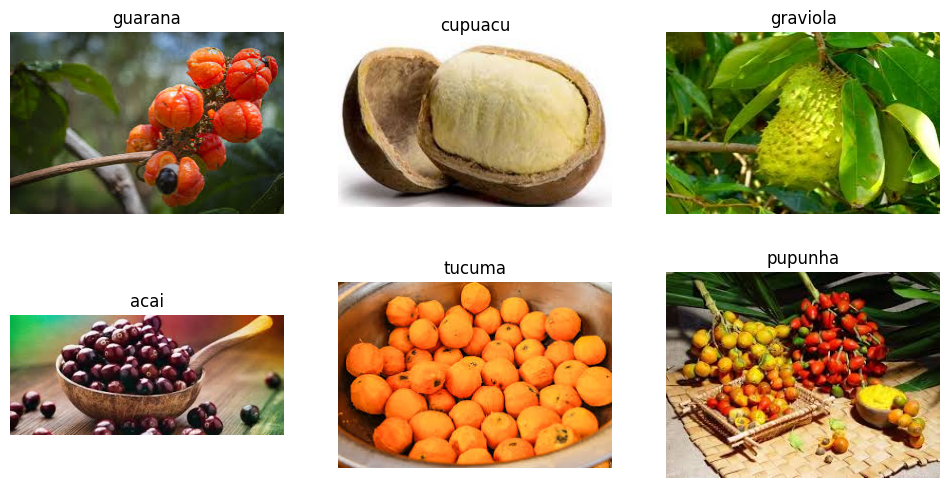

In [11]:
def visualize_images(train_dir, class_names):
    fig, axes = plt.subplots(2, len(class_names) // 2, figsize=(12, 6))
    axes = axes.flatten()
    for i, class_name in enumerate(class_names):
        class_path = os.path.join(train_dir, class_name)
        img_name = random.choice(os.listdir(class_path))
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path)
        axes[i].imshow(img)
        axes[i].set_title(class_name)
        axes[i].axis("off")
    plt.show()

visualize_images(train_dir, class_names)

In [13]:
CorruptedImage = []
for class_name in class_names:
    class_path = os.path.join(train_dir, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        try:
            img = load_img(img_path)  # Try opening the image
        except (IOError, SyntaxError):
            CorruptedImage.append(img_path)
            os.remove(img_path)
            print(f"Corrupted image removed: {img_path}")

if not CorruptedImage:
    print("No Corrupted Image Found.")

No Corrupted Image Found.


#Task 2: Loading and Preprocessing Image Data in keras:

In [14]:
img_height, img_width = 128, 128
batch_size = 32
validation_split = 0.2

In [15]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    validation_split=validation_split,
    subset='training',
    seed=123
)

Found 90 files belonging to 6 classes.
Using 72 files for training.


In [16]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    validation_split=validation_split,
    subset='validation',
    seed=123
)

Found 90 files belonging to 6 classes.
Using 18 files for validation.


In [17]:
rescale = Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (rescale(x), y))
val_ds = val_ds.map(lambda x, y: (rescale(x), y))

# Task 3 - Implement a CNN


In [18]:
num_classes = len(class_names)

model = Sequential([
    Conv2D(32, (3,3), activation='relu', padding='same', input_shape=(img_height, img_width, 3)),
    MaxPooling2D((2,2), strides=2),

    Conv2D(32, (3,3), activation='relu', padding='same'),
    MaxPooling2D((2,2), strides=2),

    Flatten(),
    Dense(64, activation='relu'),
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 32)          │           9,248 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │       2,097,216 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 6)                   │             774 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,116,454 (8.07 MB)

 Trainable params: 2,116,454 (8.07 MB)

 Non-trainable params: 0 (0.00 B)

#Task 4: Compile the Model

In [19]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

#Train the Model

In [20]:
callbacks = [
    ModelCheckpoint("best_model.h5", save_best_only=True, monitor="val_accuracy", mode="max"),
    EarlyStopping(monitor="val_loss", patience=10, restore_best_weights=True)
]

history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=250,
    batch_size=16,
    callbacks=callbacks
)

Epoch 1/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 333ms/step - accuracy: 0.1655 - loss: 2.0009

3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 541ms/step - accuracy: 0.1623 - loss: 2.0271 - val_accuracy: 0.1111 - val_loss: 1.7995
Epoch 2/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 322ms/step - accuracy: 0.3374 - loss: 1.7546

3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 450ms/step - accuracy: 0.3225 - loss: 1.7585 - val_accuracy: 0.8333 - val_loss: 1.4557
Epoch 3/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 537ms/step - accuracy: 0.2374 - loss: 1.7198 - val_accuracy: 0.3889 - val_loss: 1.6416
Epoch 4/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 725ms/step - accuracy: 0.2422 - loss: 1.6165 - val_accuracy: 0.1667 - val_loss: 1.7902
Epoch 5/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 420ms/step - accuracy: 0.4362 - loss: 1.4273 - val_accuracy: 0.6111 - val_loss: 1.4616
Epoch 6/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 404ms/step - accuracy: 0.4970 - loss: 1.3003 - val_accuracy: 0.5000 - val_loss: 1.5260
Epoch 7/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 403ms/step - accuracy: 0.6536 - loss: 1.1137 - val_accuracy: 0.5556 - val_loss: 1.3466
Epoch 8/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 418ms/step - accuracy: 0.7609 - loss: 0.8918 - val_accuracy: 0.7778 - val_loss: 0.9518
Epoch 9/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 400ms/step - accuracy: 0.7912 - loss: 0.6994 - val_accuracy: 0.7222 - val_loss: 0.9

3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 562ms/step - accuracy: 0.9440 - loss: 0.1443 - val_accuracy: 0.8889 - val_loss: 0.3964
Epoch 15/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 691ms/step - accuracy: 1.0000 - loss: 0.0597 - val_accuracy: 0.8333 - val_loss: 0.4289
Epoch 16/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 403ms/step - accuracy: 1.0000 - loss: 0.0261 - val_accuracy: 0.7778 - val_loss: 0.6192
Epoch 17/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 2s 409ms/step - accuracy: 1.0000 - loss: 0.0201 - val_accuracy: 0.8333 - val_loss: 0.4720
Epoch 18/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 408ms/step - accuracy: 1.0000 - loss: 0.0065 - val_accuracy: 0.8333 - val_loss: 0.4446
Epoch 19/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 488ms/step - accuracy: 1.0000 - loss: 0.0038 - val_accuracy: 0.8889 - val_loss: 0.4435
Epoch 20/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 616ms/step - accuracy: 1.0000 - loss: 0.0025 - val_accuracy: 0.8333 - val_loss: 0.4671
Epoch 21/250
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 603ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 0.8333 - val_lo

#Task 5: Evaluate the Model

In [21]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False
)

test_ds = test_ds.map(lambda x, y: (rescale(x), y))
test_loss, test_accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Found 30 files belonging to 6 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step - accuracy: 0.6333 - loss: 0.9948
Test Accuracy: 63.33%


#Task 6: Save and Load the Model


In [26]:
model.save("model.h5")
loaded_model = tf.keras.models.load_model("model.h5")


#Task 7: Predictions and Classification Report


In [23]:
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = loaded_model.predict(images)
    y_pred.extend(np.argmax(preds, axis=1))
    y_true.extend(labels.numpy())

print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 316ms/step
              precision    recall  f1-score   support

     guarana       0.67      0.80      0.73         5
     cupuacu       1.00      0.60      0.75         5
    graviola       0.67      0.80      0.73         5
        acai       0.56      1.00      0.71         5
      tucuma       1.00      0.20      0.33         5
     pupunha       0.40      0.40      0.40         5

    accuracy                           0.63        30
   macro avg       0.71      0.63      0.61        30
weighted avg       0.71      0.63      0.61        30



#Visualization:

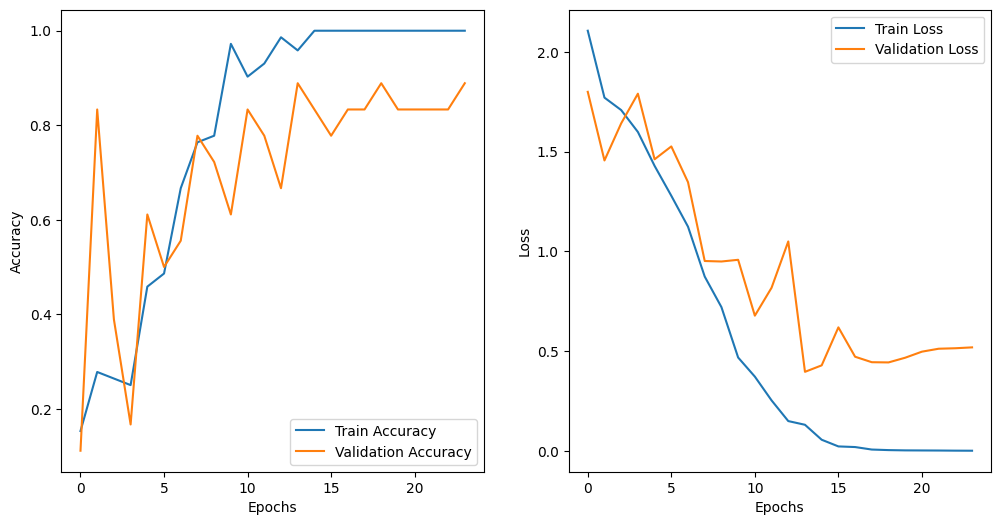

In [24]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()